In [1]:
import pandas as pd
file_path = "ibm_attrition.csv"
df = pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [2]:
df = df.drop(columns=["EmployeeCount", "EmployeeNumber"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df_dummy = pd.get_dummies(df, columns=[
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "Over18",
    "OverTime",
])
df_dummy.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,0,1,0,0,0,1,1,0,1
1,49,No,279,8,1,3,61,2,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,0,0,0,0,0,0,1,1,0,1
3,33,No,1392,3,4,4,56,3,1,3,...,0,1,0,0,0,1,0,1,0,1
4,27,No,591,2,1,1,40,3,1,2,...,0,0,0,0,0,1,0,1,1,0


In [4]:
X = df_dummy.drop("Attrition", axis=1)
y = df_dummy["Attrition"]
print(X.shape, y.shape)

(1470, 53) (1470,)


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)

In [7]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [8]:
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [9]:
# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [11]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=53))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               5400      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 15,702
Trainable params: 15,702
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=3
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/60
Epoch 2/60
Epoch 3/60
Epoch 4/60
Epoch 5/60
Epoch 6/60
Epoch 7/60
Epoch 8/60
Epoch 9/60
Epoch 10/60
Epoch 11/60
Epoch 12/60
Epoch 13/60
Epoch 14/60
Epoch 15/60
Epoch 16/60
Epoch 17/60
Epoch 18/60
Epoch 19/60
Epoch 20/60
Epoch 21/60
Epoch 22/60
Epoch 23/60
Epoch 24/60
Epoch 25/60
Epoch 26/60
Epoch 27/60
Epoch 28/60
Epoch 29/60
Epoch 30/60
Epoch 31/60
Epoch 32/60
Epoch 33/60
Epoch 34/60
Epoch 35/60
Epoch 36/60
Epoch 37/60
Epoch 38/60
Epoch 39/60
Epoch 40/60
Epoch 41/60
Epoch 42/60
Epoch 43/60
Epoch 44/60
Epoch 45/60
Epoch 46/60
Epoch 47/60
Epoch 48/60
Epoch 49/60
Epoch 50/60
Epoch 51/60
Epoch 52/60
Epoch 53/60
Epoch 54/60
Epoch 55/60
Epoch 56/60
Epoch 57/60
Epoch 58/60
Epoch 59/60
Epoch 60/60


In [15]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

 - 0s - loss: 0.9432 - acc: 0.8560
Normal Neural Network - Loss: 0.9431987275247988, Accuracy: 0.85597825050354


In [16]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

C:\Users\39319362\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [17]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['No' 'No' 'Yes' 'No' 'No']
Actual Labels: ['No', 'No', 'No', 'No', 'No']


In [18]:
from feature_selector import FeatureSelector

In [19]:
train_labels = df_dummy['Attrition']
train = df_dummy.drop(columns = ['Attrition'])


In [20]:
fs = FeatureSelector(data = train, labels = train_labels)

In [21]:
fs.identify_collinear(correlation_threshold=0.7)

11 features with a correlation magnitude greater than 0.70.



In [22]:
correlated_features = fs.ops['collinear']
correlated_features[:]

['MonthlyIncome',
 'PerformanceRating',
 'TotalWorkingYears',
 'YearsInCurrentRole',
 'YearsWithCurrManager',
 'BusinessTravel_Travel_Rarely',
 'Department_Sales',
 'Gender_Male',
 'JobRole_Human Resources',
 'JobRole_Sales Executive',
 'OverTime_Yes']

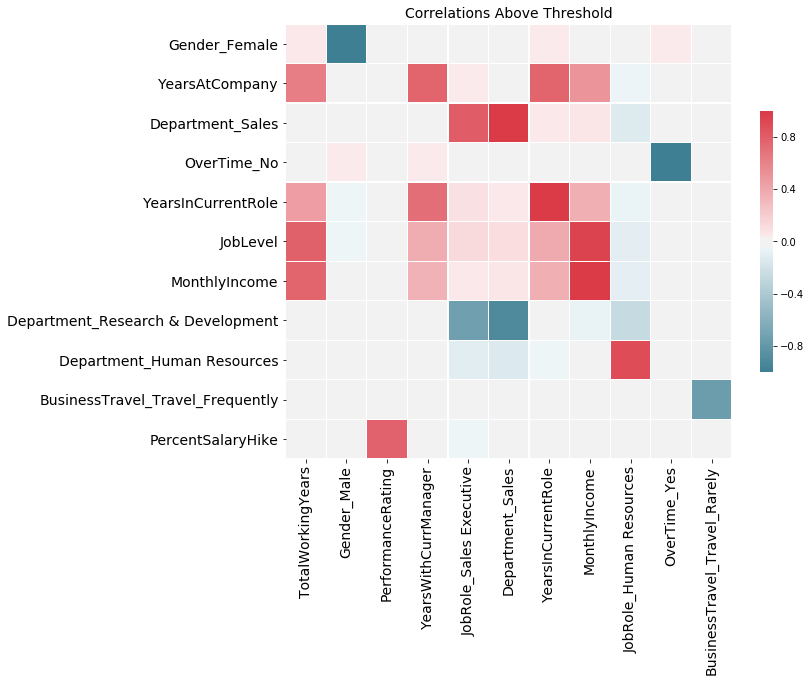

In [23]:
fs.plot_collinear()

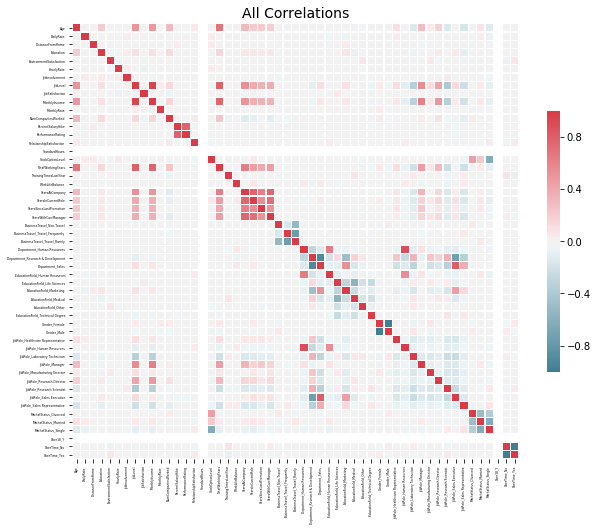

In [24]:
fs.plot_collinear(plot_all=True)

In [25]:
# Pass in the appropriate parameters
fs.identify_zero_importance(task = 'classification', 
                            eval_metric = 'auc', 
                            n_iterations = 10, 
                             early_stopping = True)
# list of zero importance features
zero_importance_features = fs.ops['zero_importance']

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[13]	valid_0's binary_logloss: 0.37169	valid_0's auc: 0.814173
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[50]	valid_0's binary_logloss: 0.383874	valid_0's auc: 0.793232
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[79]	valid_0's binary_logloss: 0.308332	valid_0's auc: 0.853482
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[17]	valid_0's binary_logloss: 0.335597	valid_0's auc: 0.828786
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[68]	valid_0's binary_logloss: 0.377065	valid_0's auc: 0.846295
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.357242	valid_0's auc: 0.735

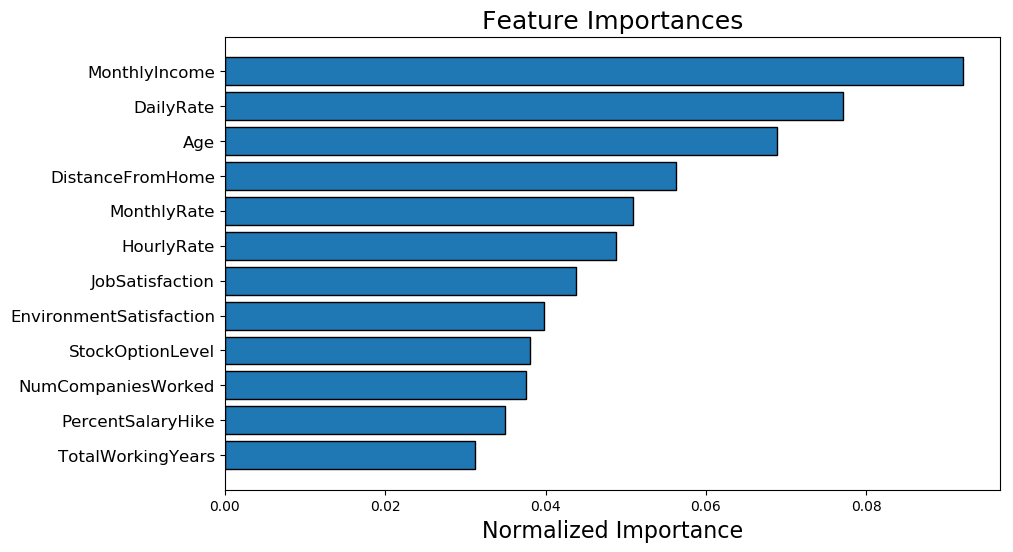

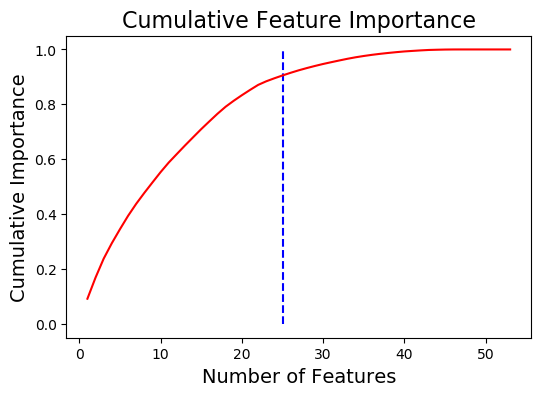

25 features required for 0.90 of cumulative importance


In [26]:
fs.plot_feature_importances(threshold = 0.9, plot_n = 12)

In [27]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[:]

['JobRole_Human Resources',
 'EducationField_Human Resources',
 'Department_Human Resources',
 'StandardHours',
 'Over18_Y',
 'PerformanceRating']